<a href="https://colab.research.google.com/github/huruifu/733-project/blob/firesize_prediction/firesize_try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('./drive/MyDrive/733_project/weather_merged/etl_filtered_v1.csv')
df

,Unnamed: 0,SOURCE_SYSTEM_TYPE,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,CONT_DATE,DISCOVERY_DATE,CONT_DOY,DISCOVERY_TIME,...,OWNER_DESCR,STATE,datetime,population_density,ELEVATION,AWND,PRCP,TMAX,TMIN,distance
0,0,FED,2011,47,Debris Burning,5.0,2455608.5,2455608.5,47.0,1300.0,...,USFS,AL,2011-02-16,7.572142,100.6,8.062714,0.0,71.000000,32.000000,0.141421
1,1,FED,2011,47,Debris Burning,5.0,2455610.5,2455608.5,49.0,820.0,...,STATE OR PRIVATE,AL,2011-02-16,31.442815,201.5,8.048481,0.0,76.942800,49.340830,0.100000
2,2,FED,2011,48,Arson,7.0,2455609.5,2455609.5,48.0,2030.0,...,USFS,AL,2011-02-17,7.572142,100.6,8.064342,0.0,70.000000,33.000000,0.200000
3,3,FED,2011,50,Arson,7.0,2455617.5,2455611.5,56.0,1800.0,...,STATE OR PRIVATE,AL,2011-02-19,49.942890,182.9,8.037152,0.0,66.000000,49.000000,0.282843
4,4,FED,2011,51,Debris Burning,5.0,2455625.5,2455612.5,64.0,1500.0,...,USFS,AL,2011-02-20,49.942890,189.0,8.042611,0.0,76.657125,49.084371,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367739,367739,NONFED,2015,75,Miscellaneous,9.0,NaN,2457097.5,NaN,NaN,...,MISSING/NOT SPECIFIED,VA,2015-03-16,33.568885,283.5,7.366097,0.0,61.000000,39.000000,0.100000
367740,367740,NONFED,2015,95,Miscellaneous,9.0,NaN,2457117.5,NaN,NaN,...,MISSING/NOT SPECIFIED,VA,2015-04-05,33.568885,283.5,7.358285,0.0,57.000000,39.000000,0.100000
367741,367741,NONFED,2015,37,Miscellaneous,9.0,NaN,2457059.5,NaN,NaN,...,MISSING/NOT SPECIFIED,VA,2015-02-06,38.354455,247.8,7.406834,0.0,70.218508,43.916184,0.100000
367742,367742,NONFED,2015,89,Miscellaneous,9.0,NaN,2457111.5,NaN,NaN,...,MISSING/NOT SPECIFIED,VA,2015-03-30,38.354455,208.2,7.384267,0.0,69.862021,43.603630,0.141421


In [2]:
df=df.iloc[:,1:]
# list the column name
df.columns
# SOURCE_SYSTEM_TYPE = Type of source database or system that the record was drawn from (federal, nonfederal, or interagency).
# FIRE_YEAR: calendar year in which the fire was discovered or confirmed to exist
# DISCOVERY_DOY: Day of year on which the fire was discovered or confirmed to exist
# DISCOVERY_DATE: date on which the fire was discovered or confirmed to exist
# DISCOVERY_TIME: time of day that the fire was discovered or confirmed to exist
# CONT_DATE: date on which the fire was declared contained or otherwise controlled 
# CONT_DOY: Day of year on which the fire was declared contained or otherwise controlled
# CONT_TIME: time of day that the fire was declared contained or otherwise controlled
# FIRE_SIZE: the estimate of acres within the final perimeter of the fire
# FIRE_SIZE_CLASS: Code for fire size based on the number of acres within the final fire perimeter
# (A: >0 <=0.25acres, B: 0.26-9.9 acres, C: 10-99.9 acres, D: 100-299 acres, E: 300-999 acres, F:1000-4999 acres, G: 5000+)
# OWNER_DESCR: Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.


Index(['SOURCE_SYSTEM_TYPE', 'FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_DESCR',
       'STAT_CAUSE_CODE', 'CONT_DATE', 'DISCOVERY_DATE', 'CONT_DOY',
       'DISCOVERY_TIME', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE_x', 'LONGITUDE_x', 'OWNER_CODE', 'OWNER_DESCR', 'STATE',
       'datetime', 'population_density', 'ELEVATION', 'AWND', 'PRCP', 'TMAX',
       'TMIN', 'distance'],
      dtype='object')

In [3]:
# delete the duplicate rows
# shape of data
df.shape
df = df.drop_duplicates()
df.shape

(367417, 25)

In [4]:
# check the missing values
print(df.columns[list(df.isnull().any())])
# df.describe()

# filter the columns contain missing values and 
df_filter=df.copy()

Index(['CONT_DATE', 'CONT_DOY', 'DISCOVERY_TIME', 'CONT_TIME'], dtype='object')


In [5]:

df_filter["DOY_diff"]=df_filter["CONT_DOY"]-df_filter["DISCOVERY_DOY"]
df_filter["TIME_diff"]=df_filter["CONT_TIME"]-df_filter["DISCOVERY_TIME"]


df_filter["hour_diff"]=df_filter["DOY_diff"]*24+(df_filter["TIME_diff"]/100)
# fill in the na rows using the average duration of the fire
sum(df_filter["hour_diff"].isna())

df_filter["hour_diff"]=df_filter["hour_diff"].fillna(df_filter["hour_diff"].mean())
df_filter.columns

df_filter["month"]=pd.to_datetime(df_filter["datetime"]).dt.month
# df['mm'] = pd.to_datetime(df['StartDate']).dt.month

In [6]:
df_filter["DISCOVERY_TIME"]=df_filter["DISCOVERY_TIME"].fillna(0000)

In [7]:
# remove the features as they do not make sense for output or correlated to others
df_filter=df_filter.drop(['DISCOVERY_DATE','CONT_DOY','CONT_TIME','CONT_DATE','DOY_diff','TIME_diff','OWNER_DESCR'],axis=1)
print(list(df_filter.isnull().any()))


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [8]:
df_filter["FIRE_SIZE_CLASS"].value_counts()
# len(df_filter["FIRE_SIZE_CLASS"])

B    172903
A    143165
C     40062
D      5639
E      2849
F      1754
G      1045
Name: FIRE_SIZE_CLASS, dtype: int64

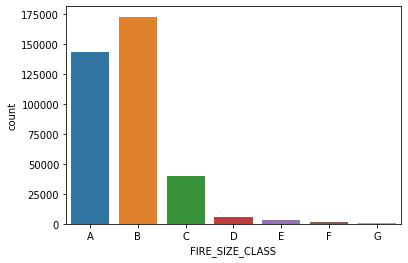

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='FIRE_SIZE_CLASS',data=df_filter,order=['A','B','C','D','E','F','G'])
plt.show()

As seen in the graph, dataset is highly imbalanced with maximum reported incidents lying in CLASS B.

Analyzing categorical features 
1: SOURCE_SYSTEM_TYPE

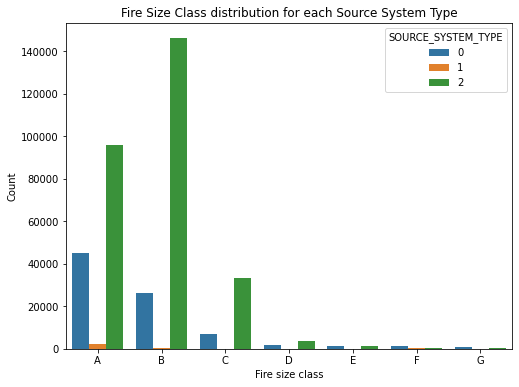

In [10]:
len(df_filter.SOURCE_SYSTEM_TYPE.unique())
# label encoder this 3 unique values
from sklearn.preprocessing import LabelEncoder
df_filter["SOURCE_SYSTEM_TYPE"]=LabelEncoder().fit_transform(df["SOURCE_SYSTEM_TYPE"])
df_filter["SOURCE_SYSTEM_TYPE"].astype("int64")

# histogram show the relationship between SOURCE_SYSTEM_TYPE and FIRE_SIZE_CLASS
plt.figure(figsize=(8,6))
sns.countplot(x="FIRE_SIZE_CLASS",hue="SOURCE_SYSTEM_TYPE",data=df_filter,order=['A','B','C','D','E','F','G'])
plt.xlabel("Fire size class")
plt.ylabel("Count")
plt.title("Fire Size Class distribution for each Source System Type")
plt.show()


As the plot shown, the distribution of the fire size class are associated with the distribution of type 2 (INTERAGCY) source system type. 
Therefore, this feature should be keep and would be useful for our model.

# check the SOURCE_SYSTEM, NWCG_REPORTING_AGENCY if still have time

Analyzing 
2: FIRE_YEAR

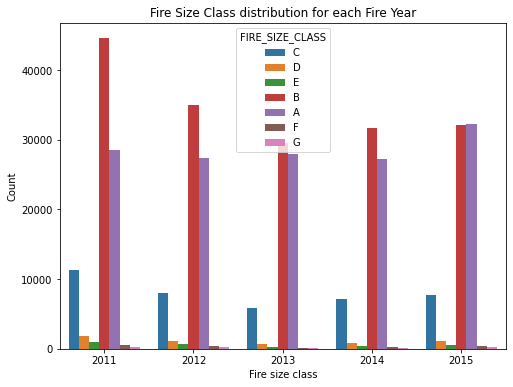

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(hue ='FIRE_SIZE_CLASS', x = "FIRE_YEAR", data = df_filter) 
plt.xlabel('Fire size class')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each Fire Year')
plt.show()

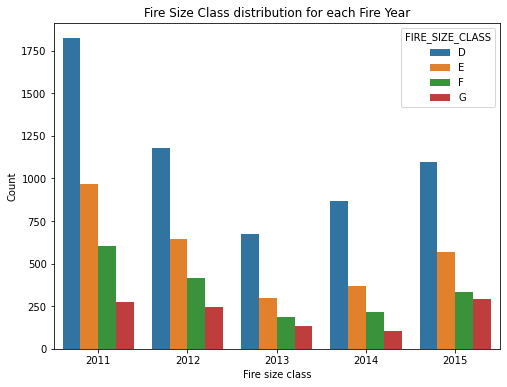

In [12]:
# 2011 has the most B,C size fires reported and 2015 has the most A size reported
# now lets check the others 
df_filter2=df_filter.copy()
df_large=(df_filter2["FIRE_SIZE_CLASS"]!='A')&(df_filter2["FIRE_SIZE_CLASS"]!='B')&(df_filter2["FIRE_SIZE_CLASS"]!='C')
large_sets=df_filter2[df_large]
plt.figure(figsize=(8,6))
sns.countplot(hue ='FIRE_SIZE_CLASS', x = "FIRE_YEAR", data = large_sets) 
plt.xlabel('Fire size class')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each Fire Year')
plt.show()

the largest fires happened mostly in 2011 and 2015. class D,E,F mostly recorded in 2011. 

Add a new feature month from datetime


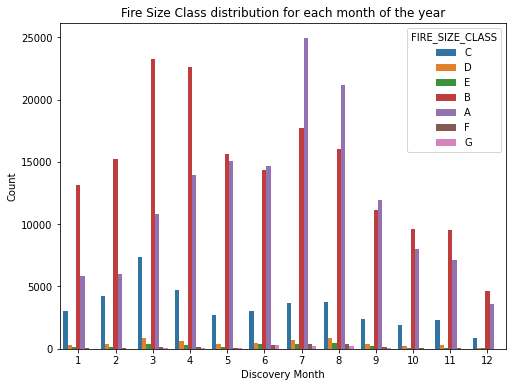

In [13]:
#Graphical analysis of discovery month feature
plt.figure(figsize=(8,6))
sns.countplot(x ='month', hue = "FIRE_SIZE_CLASS", data = df_filter) 
plt.xlabel('Discovery Month')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each month of the year')
plt.show()

1-4 month, the class B fire mostly occured. 9-12 month, all classes fire reduced.
6-8 month, the class G occured more than other months. 

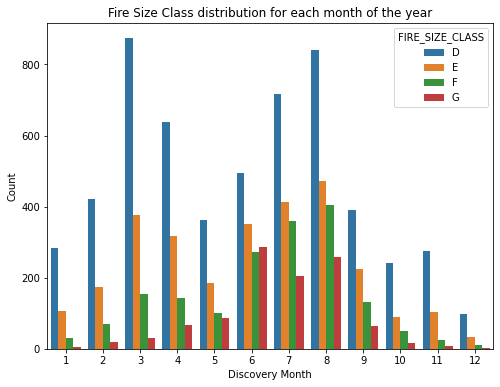

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x ='month', hue = "FIRE_SIZE_CLASS", data = large_sets) 
plt.xlabel('Discovery Month')
plt.ylabel('Count')
plt.title('Fire Size Class distribution for each month of the year')
plt.show()

6-8 are the peek stage of the large fire. 
3,4 month size D fire happened a lot. 

Anlyzing 3:DISCOVERY_TIME

*   null --> 0
*   early morning: 5am - 12pm --> 1
*   afternoon: 12pm-5pm --> 2
*   evening: 5pm-10pm --> 3
*   night: 10pm-5am --> 4




In [15]:

def convert_time(df):
    
    if (df['DISCOVERY_TIME'] ==0):
      return 0
    elif (500<df['DISCOVERY_TIME'] <=1200):
        return 1
    elif (1200<df['DISCOVERY_TIME'] <=1700):
        return 2
    elif (1700<df['DISCOVERY_TIME'] <=2200):
        return 3
    else:
        return 4
    
df_filter2['time'] = df_filter2.apply(convert_time, axis = 1)
df_filter2['time'].astype('int64')

0         2
1         1
2         3
3         3
4         2
         ..
367739    0
367740    0
367741    0
367742    0
367743    0
Name: time, Length: 367417, dtype: int64

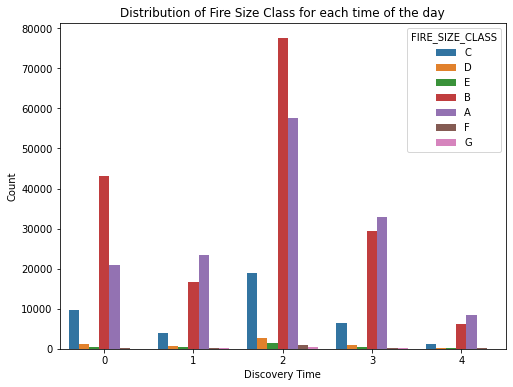

In [16]:

plt.figure(figsize=(8,6))
sns.countplot(x ='time', hue = "FIRE_SIZE_CLASS", data = df_filter2) 
plt.xlabel('Discovery Time')
plt.ylabel('Count')
plt.title('Distribution of Fire Size Class for each time of the day')
plt.show()

latitude and longitude

In [17]:
import numpy as np

# round off the values and apply flooring group the nearly forest fires 
df_filter2['LATITUDE'] = (df_filter2['LATITUDE_x']*10).apply(np.floor)/10
df_filter2['LONGITUDE'] = (df_filter2['LONGITUDE_x']*10).apply(np.floor)/10

geom_grp = df_filter2.groupby(['LATITUDE', 'LONGITUDE'])
wildfires = geom_grp['FIRE_SIZE_CLASS'].agg(['count']).reset_index()
wildfires

,LATITUDE,LONGITUDE,count
0,19.0,-155.8,3
1,19.1,-155.8,2
2,19.1,-155.5,1
3,19.2,-155.7,1
4,19.2,-155.5,3
...,...,...,...
49521,69.2,-155.3,1
49522,69.4,-154.2,1
49523,70.1,-151.2,1
49524,70.1,-150.7,1


In [18]:
from bokeh.models import ColumnDataSource, LogColorMapper, ColorBar, LogTicker
from bokeh.plotting import figure, show
import colorcet as cc
from bokeh.io import output_notebook

source = ColumnDataSource(wildfires)
geo = figure(title="Geographical representation of wildfires in the U.S.(2011-2015)",
           toolbar_location=None, plot_width=600, plot_height=400)
geo.background_fill_color = "black"
geo.grid.grid_line_color = None
geo.axis.visible = False
#Using fire palette already available in cc
color_mapper = LogColorMapper(palette=cc.fire, low=1, high=4232)
glyph = geo.circle('LONGITUDE', 'LATITUDE', source=source,
          color={'field': 'count', 'transform' : color_mapper},
          size=1)
#Legend: color_bar
color_bar = ColorBar(color_mapper=color_mapper,  label_standoff=12, border_line_color=None, ticker=LogTicker(), location=(0,0))
output_notebook()
geo.add_layout(color_bar, 'right')
show(geo)

Lighter color means more wildfires 

In [19]:
df_filter2["STATE"]=LabelEncoder().fit_transform(df_filter2["STATE"])
df_filter2["STATE"].astype("int64")

df_filter2["temp_average"]=(df_filter2["TMAX"]+df_filter2["TMIN"])/2

In [20]:
df_filter2=df_filter2.drop(columns=['DISCOVERY_DOY','DISCOVERY_TIME','datetime','STAT_CAUSE_DESCR','LATITUDE_x','LONGITUDE_x','FIRE_SIZE','TMAX','TMIN'])

Feature engineer

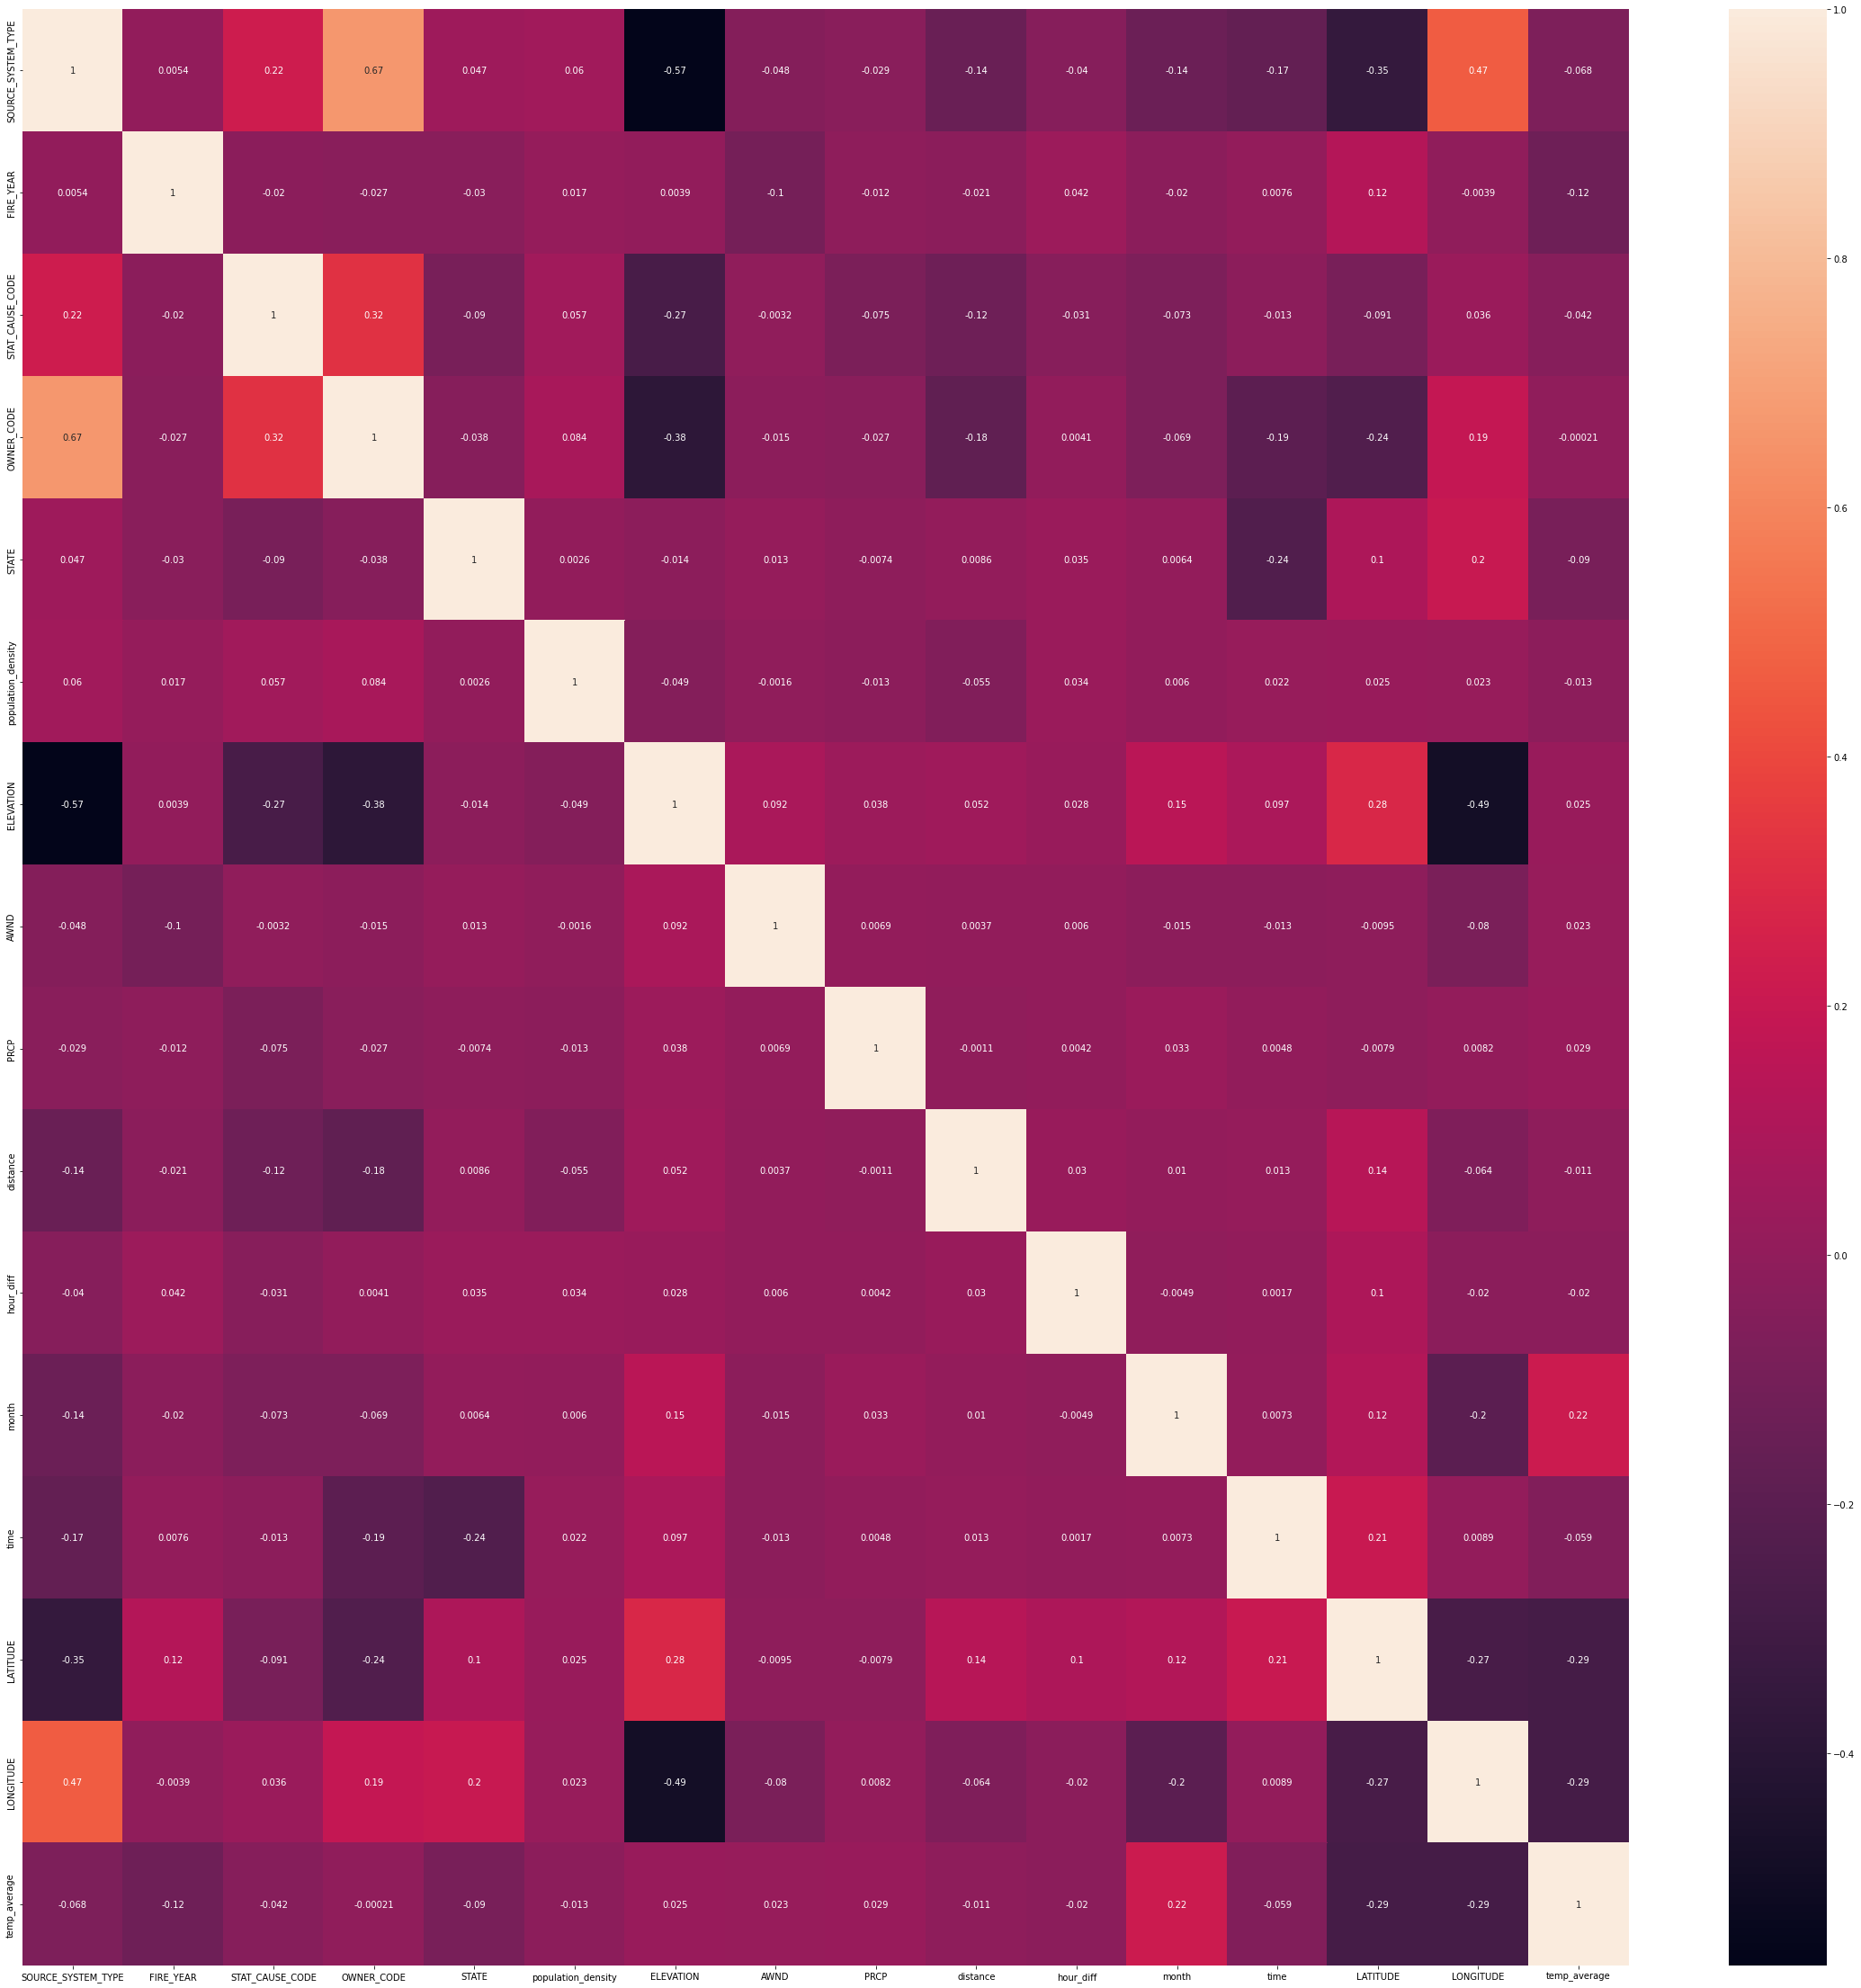

In [21]:
plt.figure(figsize=(40,40))
# df_filter.columns
corr=df_filter2.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [22]:
df_final = df_filter2.copy()
df_final.shape

(367417, 17)

The final selected features are not much correlated to each other. ready for the model

## Multi-class performance 
For a high class imbalance, always choose the F1 score because a high F1 score considers both precision and recall.

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# separate features and target
feature=df_final.drop(['FIRE_SIZE_CLASS'],axis=1)
# feature = df_filter.drop("FIRE_SIZE_CLASS",1)
y=df_final["FIRE_SIZE_CLASS"]

# split data intp test and train datasets
feature_train, feature_test, y_train, y_test = train_test_split(feature, y, test_size=0.3,stratify=y)


In [24]:
# feature reduction
# Standardizing the features

# since the longitude and lantitude are geospatial features, do not normalize 
# x = StandardScaler().fit_transform(feature)

In [25]:
#Funstion for MAPE error to be used further
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
knnmodel= KNeighborsClassifier(n_neighbors=5).fit(feature_train,y_train)

knn_predict = knnmodel.predict(feature_test)

# train_accuracy = knnmodel.score(feature_train,y_train)
# test_accuracy = knnmodel.score(feature_test,y_test)

from  sklearn.metrics import mean_absolute_error, confusion_matrix, log_loss
knn_MAE = mean_absolute_error(y_test, knn_predict)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
len(principalDf)

In [ ]:
df_filter.reset_index(drop=True, inplace=True)
finalDf = pd.concat([principalDf, df_filter['FIRE_SIZE_CLASS']], axis = 1)
finalDf

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C','D','E','F','G']
colors = ['r', 'g', 'b','w','y','q','z']
for target, color in zip(targets,colors):
    indicesToKeep = df_filter['FIRE_SIZE_CLASS'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# split data intp test and train datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test,

Next I fit both a distance-based Logistic Regression and a tree-based Random Forest Classifier (RFC) to my sub-sample, using a 5-fold cross-validation technique with an 80% Train, 20% Validate split for baselines, and the results were underwhelming.

You can see above that the Logistic Regression yielded a 0.00 recall for categories ‘C’ through ‘G’, basically saying that it didn’t successfully classify any fires into those groups, which isn’t good. The Random Forest Classifier on the right didn’t do much better.

Tuning the Model